## Assignment 3
### Pradeep Mundlik (AI21BTECH11022)

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from astroML.resample import bootstrap
from astroML.stats import median_sigmaG
from scipy.optimize import curve_fit

### Q-1

In [83]:
# Function for bootstrap sampling
def bootstrap(data, n_samples, estimator, kwargs=None):
    if kwargs is None:
        kwargs = {}
    samples = np.random.choice(data, size=(len(data), n_samples), replace=True)
    return estimator(samples, **kwargs)

# Function to compute median and sigmaG
def median_sigmaG(samples, axis):
    median_values = np.median(samples, axis=axis)
    sigmaG_values = 1.4826 * np.median(np.abs(samples - np.expand_dims(median_values, axis=axis)), axis=axis)
    return median_values, sigmaG_values

# Generate the data
samples = 1000
samples_bootstrap = 10000
data = np.random.normal(0, 1, size=samples)

# Compute the median and sigmaG using bootstrap
median, sigmaG = bootstrap(data, samples_bootstrap, median_sigmaG, kwargs=dict(axis=0))

x = np.linspace(-1, 1, 5000)
std = np.sqrt(np.pi / (2.0 * samples))
pdf = norm(np.mean(median), std).pdf(x)

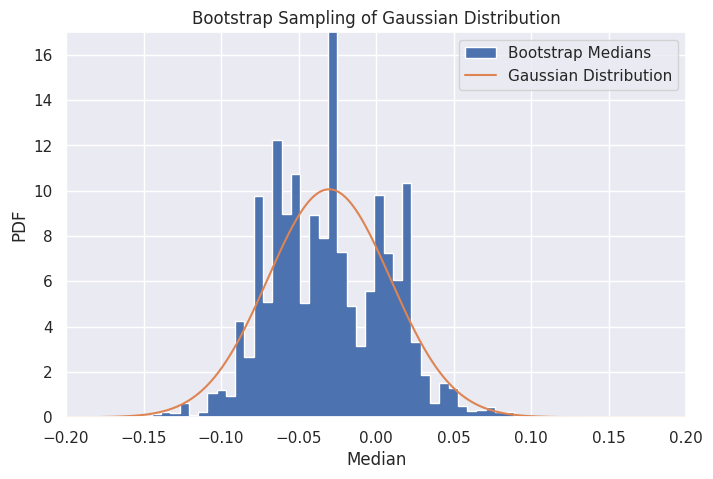

In [84]:
# Plotting the values
plt.figure(figsize=(8, 5))
plt.hist(median, bins=50, histtype='stepfilled', density=True, label='Bootstrap Medians')
plt.plot(x, pdf, label='Gaussian Distribution')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 17)
plt.xlabel('Median')
plt.ylabel('PDF')
plt.title('Bootstrap Sampling of Gaussian Distribution')
plt.legend()
plt.show()

### Q-2

In [85]:
# Data from the paper
data = [[5 ,203 ,495 ,21 ,5 ,-0.33],
[6 ,58 ,173 ,15 ,9 ,0.67],
[7 ,210 ,479 ,27 ,4 ,-0.02],
[8 ,202 ,504 ,14 ,4 ,-0.05],
[9 ,198 ,510 ,30 ,11 ,-0.84],
[10 ,158 ,416 ,16 ,7 ,-0.69],
[11 ,165 ,393 ,14 ,5 ,0.30],
[12 ,201 ,442 ,25 ,5 ,-0.46],
[13 ,157 ,317 ,52 ,5 ,-0.03],
[14 ,131 ,311 ,16 ,6 ,0.50],
[15 ,166 ,400 ,34 ,6 ,0.73],
[16 ,160 ,337 ,31 ,5 ,-0.52],
[17 ,186 ,423 ,42 ,9 ,0.90],
[18 ,125 ,334 ,26 ,8 ,0.40],
[19 ,218 ,533 ,16 ,6 ,-0.78],
[20 ,146 ,344 ,22 ,5 ,-0.56]]

In [86]:
x = np.array(data)[:,1]
y = np.array(data)[:,2]
sigma_y = np.array(data)[:,3]

# Fitting the data
value = np.array([0, 0])

def linear(x, m, c): return m * x + c

[m_fit, c_fit], cov = curve_fit(linear, x, y, value, sigma=sigma_y)
y_fit = linear(x, m_fit, c_fit)

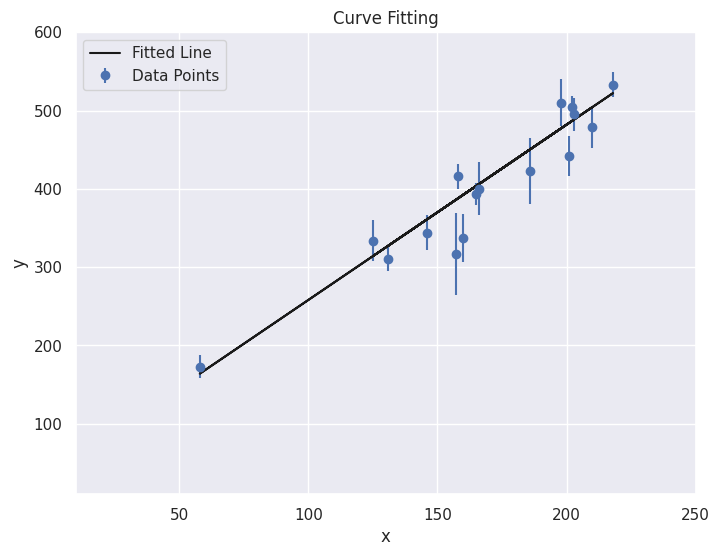

In [91]:
# Plotting the data
plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=sigma_y, fmt='o', label='Data Points')
plt.plot(x, y_fit, 'k', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10,250)
plt.ylim(10,600)
plt.legend()
plt.title("Curve Fitting")
plt.show()

### Q-3

In [92]:
chi_sq_vals = np.array([0.96, 0.24, 3.84, 2.85]) * 49

p_values = [1 - stats.chi2(49).cdf(chi_sq) for chi_sq in chi_sq_vals]

print("The p-values are:", p_values)

The p-values are: [0.5529264339960218, 0.9999999917009567, 0.0, 1.2107292945984227e-10]
